In [2]:
import matplotlib.pyplot as plt
import numpy as np
from proj1_helpers import *
from implement import *


DATA_FOLDER = 'data'
DATA_TRAIN_PATH = '../data/train.csv'


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)



In [3]:
print("Boson not detected " + str(y[y == -1].shape[0]))
print("Boson  detected " + str(y[y == 1].shape[0]))

ind_DER_mass_MMC = 0
ind_DER_mass_transverse_met_lep = 1
ind_DER_mass_vis = 2
ind_DER_pt_h   = 3
ind_DER_deltaeta_jet_jet = 4
ind_DER_mass_jet_jet = 5
ind_DER_prodeta_jet_jet = 6
ind_DER_deltar_tau_lep = 7
ind_DER_pt_tot   = 8
ind_DER_sum_pt   = 9
ind_DER_pt_ratio_lep_tau   = 10
ind_DER_met_phi_centrality   = 11
ind_DER_lep_eta_centrality   = 12
ind_PRI_tau_pt   = 13
ind_PRI_tau_eta   = 14
ind_PRI_tau_phi   = 15
ind_PRI_lep_pt   = 16
ind_PRI_lep_eta = 17
ind_PRI_lep_phi = 18
ind_PRI_met   = 19
ind_PRI_met_phi   = 20
ind_PRI_met_sumet   = 21
ind_PRI_jet_num   = 22
ind_PRI_jet_leading_pt   = 23
ind_PRI_jet_leading_eta   = 24
ind_PRI_jet_leading_phi   = 25
ind_PRI_jet_subleading_pt   = 26
ind_PRI_jet_subleading_eta   = 27
ind_PRI_jet_subleading_phi   = 28
ind_PRI_jet_all_pt   = 29



Boson not detected 164333
Boson  detected 85667


Step 1 : Correct the values for jet_num = 3 // All the values in DER_mass_MMC = -999.000
We correct them by extracting the correct values in this column (which is DER_mass_MMC)
And train a model to predict the value of this column using the values from the other parameters

Task 1 from this step : Extract and store in proper way, in order to have a 
- 'y' vector containing the right values of DER_mass_MMC
- 'x' matrix containing the others columns from the right values of DER_mass_MMC (associated to y)
- 'wrongX_topredict' containing the parameters from the wrong values of DER_mass_MMC 

We will then train the model using y and x, and then compute this trained model with wrongX_topredict in order to have some approx. correct values and replace all the -999.000

In [4]:
# Extract indices from dataset only jet_num = 3 // ravel() is used to transform into a single vector the indices
ind_jet3 = np.argwhere((tX[:,ind_PRI_jet_num] == 3)).ravel()

# Create new dataset extracting only jet_num = 3
datajet3 = tX[ind_jet3]
colToDelete = [ind_PRI_jet_num]    
datajet3 = np.delete(datajet3, colToDelete , axis=1)

print(datajet3.min(axis=0))
# Now we want to extract and correct -999.000 values from DER_mass_MMC

print("Length of Jet_num = 3 : " +str(datajet3[:,ind_DER_mass_MMC].shape))

# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
ind_wrongjet3 = np.argwhere(datajet3[:,ind_DER_mass_MMC] == -999.000).ravel()
print(ind_wrongjet3)

# Extract indices where the values of DER_mass_MMC are correct // We will train from these datas
ind_rightjet3 = np.argwhere(datajet3[:,ind_DER_mass_MMC] != -999.000).ravel()
print(ind_rightjet3)

# Extract data DER_mass_MMC only wrong values
wrongjet3 = datajet3[ind_wrongjet3]
print(wrongjet3.shape)

#Create the data that will compute the predicted y (DER_mass_MMC)
tx_wrongjet3 = np.delete(wrongjet3, ind_DER_mass_MMC, axis=1)
print(tx_wrongjet3.shape)


# Extract data DER_mass_MMC only correct values
rightjet3 = datajet3[ind_rightjet3]
print(rightjet3.shape)
#Now we'll extract the DER_mass_MMC column and turn it into a 'y' vector sample,
# The others columns will be the 'X' data samples
y_rightjet3 = rightjet3[:, ind_DER_mass_MMC]
print(y_rightjet3.shape)
tx_rightjet3 = np.delete(rightjet3, ind_DER_mass_MMC, axis=1)
print(tx_rightjet3.shape)

[-9.99000e+02  0.00000e+00  1.03420e+01  7.77000e-01  0.00000e+00
  1.70840e+01 -1.53470e+01  3.79000e-01  4.00000e-02  1.45486e+02
  8.10000e-02 -1.41400e+00  0.00000e+00  2.00010e+01 -2.49600e+00
 -3.14100e+00  2.60010e+01 -2.48500e+00 -3.14200e+00  2.08000e-01
 -3.14100e+00  2.27100e+01  3.12660e+01 -4.43900e+00 -3.14100e+00
  3.02350e+01 -4.49100e+00 -3.14200e+00  9.28120e+01]
Length of Jet_num = 3 : (22164,)
[   16    43    94 ... 22150 22161 22162]
[    0     1     2 ... 22159 22160 22163]
(1477, 29)
(1477, 28)
(20687, 29)
(20687,)
(20687, 28)


Now that we have the data we will train the model

In [5]:
from implement import *
from cross_validation import *
import matplotlib.pyplot as plt

In [6]:
#best_degree_selection(y_rightjet3,tx_rightjet3, np.arange(1,11), 5, np.logspace(-4, 0, 30), seed = 2)

# Best degree : 2 / Best lambda : 0.00013738237958832623

[ 89.744 114.744 121.681 ... 114.996 106.786 130.075]
[ 87.2145833  123.03631957 118.16639588 ... 106.8685302  104.59918838
 118.64741286]


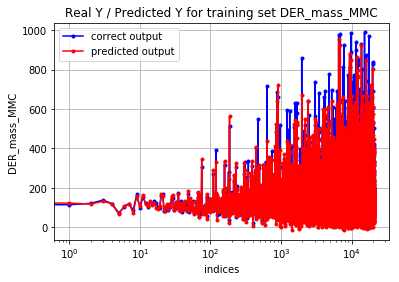

In [10]:
tx_rightjet3_poly = build_poly(tx_rightjet3, 2)


_, w_jet3 = ridge_regression(y_rightjet3, tx_rightjet3_poly, 0.00013738237958832623)



y_pred = tx_rightjet3_poly.dot(w_jet3)
print(y_rightjet3)
print(y_pred)


plt.semilogx(np.arange(y_pred.shape[0]), y_rightjet3, marker=".", color='b', label='correct output')
plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='r', label='predicted output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Real Y / Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

#cross_validation_demo(y_rightjet3,tx_rightjet3, 2, 5)

The model is trained so we will now compute/predict the values for the wrong ones.

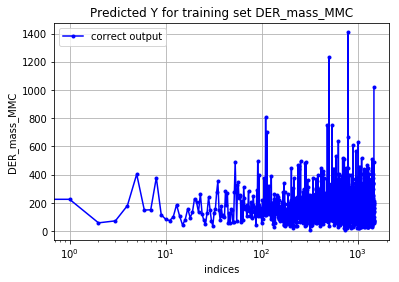

In [13]:
tx_wrongjet3_poly = build_poly(tx_wrongjet3, 2)

y_pred = tx_wrongjet3_poly.dot(w_jet3)


plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='b', label='correct output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

We will now correct the initial dataset.

In [14]:
wrongjet3[:, ind_DER_mass_MMC] = y_pred

datajet3[ind_wrongjet3] = wrongjet3

datajet3.min(axis=0)

array([ 7.46615658e+00,  0.00000000e+00,  1.03420000e+01,  7.77000000e-01,
        0.00000000e+00,  1.70840000e+01, -1.53470000e+01,  3.79000000e-01,
        4.00000000e-02,  1.45486000e+02,  8.10000000e-02, -1.41400000e+00,
        0.00000000e+00,  2.00010000e+01, -2.49600000e+00, -3.14100000e+00,
        2.60010000e+01, -2.48500000e+00, -3.14200000e+00,  2.08000000e-01,
       -3.14100000e+00,  2.27100000e+01,  3.12660000e+01, -4.43900000e+00,
       -3.14100000e+00,  3.02350000e+01, -4.49100000e+00, -3.14200000e+00,
        9.28120000e+01])

(22164, 29)
(250000,)
(22164,)


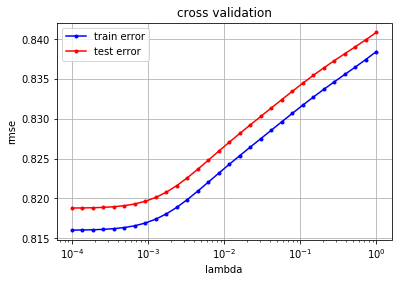

In [15]:
print(datajet3.shape)
print(y.shape)

y_jet3 = y[ind_jet3]
print(y_jet3.shape)

cross_validation_demo(y_jet3,datajet3, 2, 5)

In [16]:
datajet3_poly = build_poly(datajet3, 2)


loss, w_pred_jet3 = ridge_regression(y_jet3, datajet3_poly, 0.00013738237958832623)
print(loss)

0.33322239546319066


In [17]:
y_pred = predict_labels(w_pred_jet3, datajet3_poly)
y_pred

result = np.sum(y_pred == y_jet3)

print("Final result : " + str(result/y_jet3.shape[0]))

Final result : 0.7578956866991517


In [22]:
datajet3_test = tX[ind_jet3]
datajet3_test_poly = build_poly(datajet3_test, 2)

print(datajet3_test)

loss_test, w_pred_jet3_test = ridge_regression(y_jet3, datajet3_test_poly, 0.00013738237958832623)
print(loss)

y_pred_test = predict_labels(w_pred_jet3_test, datajet3_test_poly)
y_pred_test

result = np.sum(y_pred_test == y_jet3)

print("Final result : " + str(result/y_jet3.shape[0]))

[[ 8.97440e+01  1.35500e+01  5.91490e+01 ...  2.24000e-01  3.10600e+00
   1.93660e+02]
 [ 1.14744e+02  1.02860e+01  7.57120e+01 ...  1.77300e+00 -2.07900e+00
   1.65640e+02]
 [ 1.21681e+02  6.04100e+00  7.32020e+01 ... -1.25700e+00 -6.09000e-01
   2.53461e+02]
 ...
 [-9.99000e+02  8.38710e+01  1.70810e+01 ...  3.07000e+00  1.61200e+00
   2.71833e+02]
 [-9.99000e+02  3.80830e+01  7.49970e+02 ...  5.15000e-01  4.16000e-01
   2.03569e+02]
 [ 1.30075e+02  3.91800e+00  6.67810e+01 ...  5.78000e-01 -2.21500e+00
   5.46066e+02]]
0.33322239546319066
Final result : 0.7576249774408952


In [24]:
loss_test, w_pred = ridge_regression(y, tX, 0.00013738237958832623)
print(loss)

y_pred_test = predict_labels(w_pred, tX)
y_pred_test

result = np.sum(y_pred_test == y)

print("Final result : " + str(result/y.shape[0]))

0.33322239546319066
Final result : 0.744396
